Instructions: By continuing the previous model based on the micro video lecture posted(Refer to DS Chapter 6 CARD and C50 Code review). Construct a C5.0 model using the test data set that utilizes the same target variable, predictor variables, and minimum cases criterion. Visualize the decision tree.

In [ ]:
import pandas as pd
import graphviz
import statsmodels.tools as stattools
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
from google.colab import files
uploaded = files.upload()

adult_test = pd.read_csv("adult_ch6_test")
adult_train = pd.read_csv("adult_ch6_training")

Saving adult_ch6_training to adult_ch6_training
Saving adult_ch6_test to adult_ch6_test


In [ ]:
# save target variable
y = adult_test[['Income']]

In [ ]:
# convert categorical variable to dummy variables
mar_np = np.array(adult_test['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [ ]:
# combine the dummy variables back with the
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_test[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)


In [ ]:
# specify names of combined matrix and the target variable
X_names = ["Cap_Gains_Losses", "Divorced", "Married", "Never-married", "Separated", "Widowed"]
y_names = ["<=50K", ">50K"]

In [ ]:
# train C5.0 model
c50_01 = DecisionTreeClassifier(criterion="entropy", min_samples_split=75, max_leaf_nodes=5).fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# obtain tree structure with labeles
data = export_graphviz(c50_01, out_file=None, feature_names=X_names, class_names=y_names)

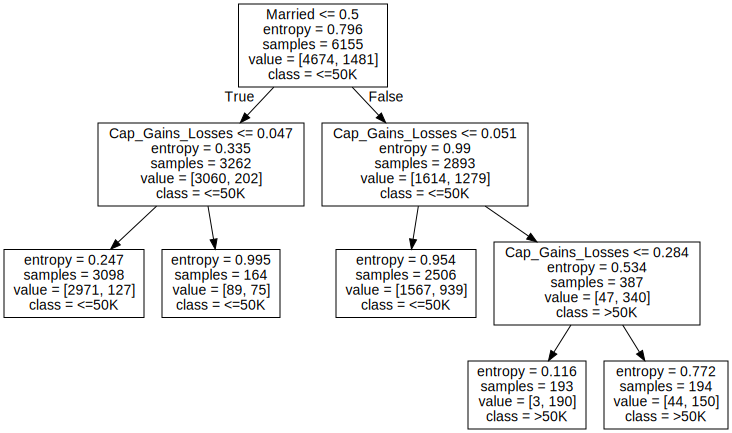

In [ ]:
# display the plot
graphviz.Source(data)

Use random forests on the training data set to predict income using marital status and capital gains and losses.

In [ ]:
# import required packages
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# save target variable
y = adult_train['Income']

In [ ]:
# convert categorical variable to dummy variables
mar_np = np.array(adult_train['Income'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [ ]:
# combine the dummy variables back with the
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_train[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

In [ ]:
# format for random forest model
rfy = np.ravel(y)

In [ ]:
# train random forest model
rf01 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X,rfy)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# return predictions
rf_train = rf01.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Use random forests using the test data set that utilizes the same target and predictor variables. Does the test data result match the training data result?

In [ ]:
# save target variable
y = adult_test['Income']

In [ ]:
# convert categorical variable to dummy variables
mar_np = np.array(adult_test['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [ ]:
# combine the dummy variables back with the
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_test[['Cap_Gains_Losses']], mar_cat_pd), axis = 1)

In [ ]:
# format for random forest model
rfy = np.ravel(y)

In [ ]:
# train random forest model
rf01 = RandomForestClassifier(n_estimators = 100, criterion='gini').fit(X,rfy)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# return predictions
rf_test = rf01.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
#this should have an output
rf_train = pd.DataFrame(rf_train)
rf_train[0].value_counts() / len(rfy)

<=50K    2.318603
>50K     0.729488
Name: 0, dtype: float64

In [ ]:
#this should have an output
rf_test = pd.DataFrame(rf_test)
rf_test[0].value_counts() / len(rfy)

<=50K    0.926401
>50K     0.073599
Name: 0, dtype: float64

In [ ]:
import datetime
import socket
def get_Host_name_IP():
    try:
        host_name = socket.gethostname()
        host_ip = socket.gethostbyname(host_name)
        print("Hostname:",host_name)
        print("IP Address:",host_ip)
    except:
        print("No visible IP Address")
get_Host_name_IP()
now = datetime.datetime.now()
print ("Time Stamp:", now.strftime("%Y-%m-%d %H:%M:%S"))

Hostname: f4c3ad946674
IP Address: 172.28.0.2
Time Stamp: 2023-01-14 15:24:41


Based on the output, both models should classify the data as 93% for <=50K and 7% for >=50K

Notes:
The main primary task is to construct c5.0 model and visualize the generated data into decision tree.
[3-9] We store our target variable into a variable, followed by developing the categorical variable to a dummy variable using `stattools.categorical` method (https://www.statsmodels.org/0.6.1/generated/statsmodels.tools.tools.categorical.html:Returns a dummy matrix given an array of categorical variable)
Afterwards, we combine the dummy variables with the column of *'Cap_Gains_Losses'* data. Then we define the names of X variables (*Cap_Gains_Losses, Divorced, Married, Separated, Widowe*d) and if it's greater than or equal 50k or lesser than as the Y variables. Moving on,
we train the c5.0 using the *entropy* criterion with *75* min_sample_split value and max of *5* leaf nodes, just like last time.
In order to visualize the decision tree, we utilize the `export_graphviz` function (https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html:This function generates a GraphViz representation of the decision tree, which is then written into out_file) to transform the data we've obtained to a DOT format.
`graphiz.Source(data)` will be the library we use to draw the DOT file generated from the previous function.
[10-16]for this task, we use a new package to import that comes inside sklearn.ensemble which is the RandomForestClassifier. We repeat the process
of saving the target variable while convering the categorical variables to dummy variables and combining them with *'Cap_Gains_Losses'*.
Afterwards, we use `np.ravel()` (The numpy.ravel() functions returns contiguous flattened array(https://numpy.org/doc/stable/reference/generated/numpy.ravel.html:1D array with all the input-array elements and with the same type as it). A copy is made only if needed. ) to format the target variable for the random forest model.
Then we can finally train the returned array using the `RandomForestClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html:A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.) with an n_estimators of *100* and criterion of *gini* as the gini index for a feature decreases at each split, which fits the model.
Lastly, we use `.predict` to return the predictions.
For the final task, we use random forests again but now we test it with the test_data to identify if the result match the training_data result.
[17-24]We repeat the entire process before we could proceed to comparing the data results of training_data and test_data. Based from what is shown in the colab,
we could deduce that both data shows that *'<=50k'* occurs more frequently and so to an extent, the results of the training_data is close to test_data.
Colab Proof:https://colab.research.google.com/drive/15EMlqpT1p_qpX4ajQxRKiCXqlJZnN6Lj?usp=sharing
Von Derwin R. Caibigan, BM2 CS170